# 1.

In [1]:
import pandas as pd

df = pd.DataFrame({'a': [1, 2, 3], 'b' : [4, 5, 6], 'c' : [7, 8, 9]})
df

,a,b,c
0,1,4,7
1,2,5,8
2,3,6,9


In [2]:
df.reset_index()

,index,a,b,c
0,0,1,4,7
1,1,2,5,8
2,2,3,6,9


In [3]:
df.melt()

,variable,value
0,a,1
1,a,2
2,a,3
3,b,4
4,b,5
5,b,6
6,c,7
7,c,8
8,c,9


In [4]:
k = df.stack()
k

0  a    1
   b    4
   c    7
1  a    2
   b    5
   c    8
2  a    3
   b    6
   c    9
dtype: int64

* stack() -> 시리즈 형태로 변환
* reset_index(), groupby(), melt(), pivot_table() -> 데이터프레임 형태 유지

* reset_index()가 다른 이유는??

# 2

In [5]:
df = pd.DataFrame({'국가(대륙)별': ['합계','합계','합계','합계','합계'], '상품군별' : ['합계','합계','합계','컴퓨터 및 주변기기', '컴퓨터 및 주변기기'],
                   '판매유형별' : ['계', '면세점', '면세점 이외', '계', '면세점'], "기간" : ["2014 1/4","2014 1/4","2014 1/4","2014 1/4","2014 1/4"]})

In [6]:
df

,국가(대륙)별,상품군별,판매유형별,기간
0,합계,합계,계,2014 1/4
1,합계,합계,면세점,2014 1/4
2,합계,합계,면세점 이외,2014 1/4
3,합계,컴퓨터 및 주변기기,계,2014 1/4
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4


In [7]:
df['쿼터'] = df["기간"].map(lambda peri : peri.split()[1])
df

,국가(대륙)별,상품군별,판매유형별,기간,쿼터
0,합계,합계,계,2014 1/4,1/4
1,합계,합계,면세점,2014 1/4,1/4
2,합계,합계,면세점 이외,2014 1/4,1/4
3,합계,컴퓨터 및 주변기기,계,2014 1/4,1/4
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,1/4


# 3.

In [8]:
df = pd.DataFrame({"A":[1,4,7], "B":[2,5,8], "C":[3,6,9]})
df

,A,B,C
0,1,2,3
1,4,5,6
2,7,8,9


In [9]:
df_new = df.copy() # 원본을 그대로 두기 위해서는 copy()를 사용해야 한다.

In [10]:
df_new['A'] = df['B'] + df['C']

In [11]:
df_new

,A,B,C
0,5,2,3
1,11,5,6
2,17,8,9


In [12]:
df_new['C'] = df['A'] + df['B']

In [13]:
df_new

,A,B,C
0,5,2,3
1,11,5,9
2,17,8,15


In [14]:
df

,A,B,C
0,1,2,3
1,4,5,6
2,7,8,9


# 4. 

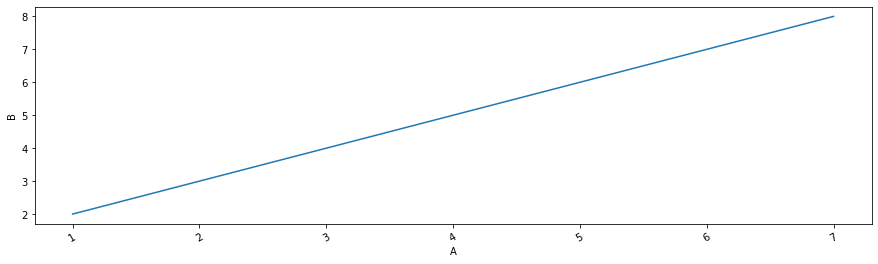

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (15,4))
plt.xticks(rotation = 30) # x축 값 기울이게 하는 방법
sns.lineplot(data = df, x = "A", y = "B" )

# 5.

In [16]:
df = pd.DataFrame({'국가(대륙)별': ['합계','합계','합계','합계','합계'], '상품군별' : ['합계','합계','합계','컴퓨터 및 주변기기', '컴퓨터 및 주변기기'],
                   '판매유형별' : ['계', '면세점', '면세점 이외', '계', '면세점'], "기간" : ["2014 1/4","2014 1/4","2014 1/4","2014 1/4","2014 1/4"], "million" : [148272,"-",'-',4915,'-']})
df

,국가(대륙)별,상품군별,판매유형별,기간,million
0,합계,합계,계,2014 1/4,148272
1,합계,합계,면세점,2014 1/4,-
2,합계,합계,면세점 이외,2014 1/4,-
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,-


In [17]:
df["million"] = df["million"].replace("-",pd.np.nan).astype(float)
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  """Entry point for launching an IPython kernel.


,국가(대륙)별,상품군별,판매유형별,기간,million
0,합계,합계,계,2014 1/4,148272.0
1,합계,합계,면세점,2014 1/4,NaN
2,합계,합계,면세점 이외,2014 1/4,NaN
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915.0
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,NaN


# 6.

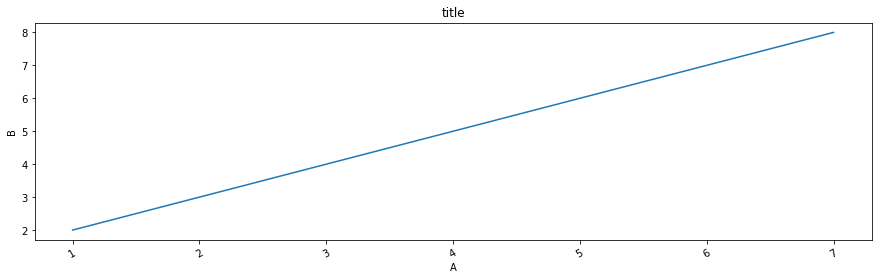

In [18]:
df = pd.DataFrame({"A":[1,4,7], "B":[2,5,8], "C":[3,6,9]})

plt.figure(figsize = (15,4))
plt.title("title") # 차트 제목 붙이는 함수
plt.xticks(rotation = 30) # x축 값 기울이게 하는 방법
sns.lineplot(data = df, x = "A", y = "B" )

# 7.

* 열과 행에 하나씩 특정되는 데이터로 이루어져 있을 경우 가장 효과적으로 시각화 할 수 있는 chart는 heatmap이다.